##### 线性回归的从零开始实现

In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):    #@save
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

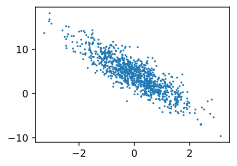

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [11]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.0600,  0.5809],
        [-1.7168, -0.4971],
        [ 1.6022, -0.6779],
        [-1.5577,  2.3946],
        [ 0.7078,  0.1903],
        [ 0.5703, -1.7562],
        [ 1.6404,  1.4031],
        [ 0.0999, -1.5952],
        [-0.2045,  0.3310],
        [ 0.0075,  0.7229]]) 
 tensor([[ 4.3268],
        [ 2.4608],
        [ 9.7153],
        [-7.0690],
        [ 4.9556],
        [11.3090],
        [ 2.7093],
        [ 9.8207],
        [ 2.6602],
        [ 1.7655]])


In [12]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [13]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [14]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [16]:
def sgd(params, lr, batch_size):  #@save
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [17]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [18]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.037800
epoch 2, loss 0.000155
epoch 3, loss 0.000053


In [19]:
print(f'w的估计误差： {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差： {true_b - b}')

w的估计误差： tensor([ 0.0001, -0.0010], grad_fn=<SubBackward0>)
b的估计误差： tensor([0.0008], grad_fn=<RsubBackward1>)
